The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


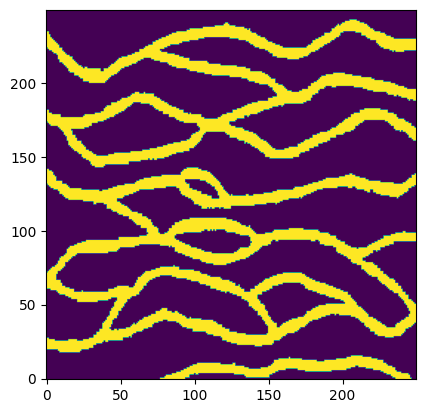

In [ ]:
%load_ext autoreload
%autoreload 2
import sklearn as sk
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'MPSlib\\scikit-mps')
import mpslib as mps
import numpy as np


TI, TI_filename=mps.trainingimages.strebelle()
plt.imshow(TI.squeeze().T)
plt.gca().invert_yaxis()
plt.show()


In [54]:
# define global parameters such as facies ratio, number of realizations, random seed, etc.
random_seed = 77777
n_real = 1
unique_facies = list(np.unique(TI))
facies_ratio = [np.sum(TI==f)/np.prod(TI.shape) for f in unique_facies]


In [55]:
# define the training image size and template size
TI_x, TI_y, TI_z = TI.shape
tempalte_size = [3, 3, 1] # in x-, y-, and z- directions (odd number for better performance)


In [68]:
# extract the training image to make a tabular form data
x_0, x_1 = int(0 + (tempalte_size[0]-1)/2), int(TI_x - (tempalte_size[0]-1)/2)
y_0, y_1 = int(0 + (tempalte_size[1]-1)/2), int(TI_y - (tempalte_size[1]-1)/2)
z_0, z_1 = int(0 + (tempalte_size[2]-1)/2), int(TI_z - (tempalte_size[2]-1)/2)

template_size_x, template_size_y, template_size_z = (x_1 - x_0), (y_1 - y_0), (z_1 - z_0)

In [ ]:

data = np.zeros((np.prod([template_size_x, template_size_y, template_size_z]), np.prod(tempalte_size)))
for zi, z  in enumerate(range(z_0, z_1)):
    for yi, y  in enumerate(range(y_0, y_1)):
        for xi, x in enumerate(range(x_0, x_1)):
            data[xi + yi*template_size_x + zi*template_size_x*template_size_y, 0] = TI[x, y, z]
            data[xi + yi*template_size_x + zi*template_size_x*template_size_y, 1] = TI[x-1, y, z]
            data[xi + yi*template_size_x + zi*template_size_x*template_size_y, 2] = TI[x+1, y, z]
            data[xi + yi*template_size_x + zi*template_size_x*template_size_y, 3] = TI[x, y-1, z]
            data[xi + yi*template_size_x + zi*template_size_x*template_size_y, 4] = TI[x, y+1, z]
            data[xi + yi*template_size_x + zi*template_size_x*template_size_y, 5] = TI[x-1, y-1, z]
            data[xi + yi*template_size_x + zi*template_size_x*template_size_y, 6] = TI[x+1, y-1, z]
            data[xi + yi*template_size_x + zi*template_size_x*template_size_y, 7] = TI[x-1, y+1, z]
            data[xi + yi*template_size_x + zi*template_size_x*template_size_y, 8] = TI[x+1, y+1, z]


In [ ]:

# train some ML model the above tabular data
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
model = DecisionTreeClassifier().fit(data[:,1:], data[:,0])

In [100]:
data[np.where(data[:,0]!=0)]
model.predict_proba(data[np.where(data[:,0]!=0)][0,1:].reshape(1,-1))

array([[0.29090909, 0.70909091]])

In [ ]:
# TODO: generate model 

array([[0.29090909, 0.70909091]])